In [1]:
%matplotlib inline
from pylab import *

In [2]:
from classy import *

Version  1.0.6
Version:  0.0.31


In [3]:
images=image.load_images('images/all_pieces/')

[red]: 192 files found
[white]: 128 files found
[black]: 192 files found


In [4]:
data=image.images_to_vectors(images)

512 vectors of length 15048
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p15043', 'p15044', 'p15045', 'p15046', 'p15047'  (15048 features)
Target values given.
Target names: 'red', 'white', 'black'
Mean:  [129.1875    136.5234375 130.4375    ... 136.5234375 130.4375
 255.       ]
Median:  [175.5 184.  174.  ... 184.  174.  255. ]
Stddev:  [67.94258836 67.75472364 65.81324192 ... 67.75472364 65.81324192
  0.        ]


In [5]:
data_train,data_test=split(data,test_size=0.2)

Original vector shape:  (512, 15048)
Train vector shape:  (409, 15048)
Test vector shape:  (103, 15048)


## Naive Bayes

In [6]:
C=NaiveBayes()
C.fit(data_train.vectors,data_train.targets)
print("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets))
print("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets))

On Training Set: 100.0
On Test Set: 100.0


In [7]:
C.means

array([[127.48734177, 136.93037975, 131.69620253, ..., 137.34810127,
        132.2721519 , 255.        ],
       [123.63917526, 131.50515464, 121.87628866, ..., 135.06185567,
        125.41237113, 255.        ],
       [130.53896104, 134.38961039, 129.85714286, ..., 138.49350649,
        133.68181818, 255.        ]])

In [8]:
C.means.shape

(3, 15048)

In [9]:
mean0=C.means[0,:]

In [10]:
mean0.shape

(15048,)

In [11]:
im0=mean0.reshape((57,66,4))

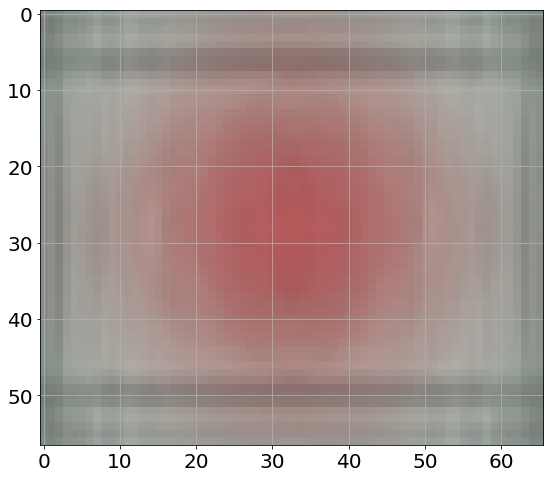

In [12]:
imshow(im0/im0.max())

## Perceptron

In [13]:
data_train.vectors.shape

(409, 15048)

In [14]:
number_of_features=data_train.vectors.shape[1]
number_of_categories=3  # the types of pieces

In [15]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'output':(number_of_categories,'linear'),  # number of classes
    'cost':'mse',
})


In [16]:
C.fit(data_train.vectors,data_train.targets,epochs=500)   # you'll want to increase epochs here

layer       filters  size              input                output
   0 input                   409 x   1 x   1 x15048   ->   409 x   1 x   1 x15048
   1 connected               409 x   1 x   1 x15048   ->   409 x   3
   2 cost                    409 x   1 x   1 x   3   ->   409 x   1 x   1 x   3


100%|█████████████████████████████████████████████████████████████| 500/500 [00:41<00:00, 12.12it/s]


In [17]:
print(("On Training Set:",C.percent_correct(data_train.vectors,data_train.targets)))
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Training Set:', 34.71882640586797)
('On Test Set:', 37.86407766990291)


In [18]:
len(C.weights)

1

In [ ]:
C.weights[0]  # first layer

In [19]:
W=C.weights[0]
W.shape

(15048, 3)

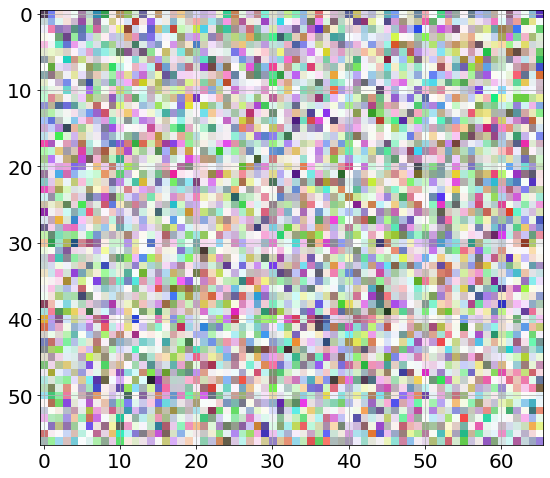

In [20]:
vec=W[:,0]
vec=(vec-W.min())/(W.max()-W.min())  # rescale to 0-1
im=vec.reshape((57,66,4))
imshow(im)

for non-linear perceptron, change the output function, like

In [ ]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'output':(number_of_categories,'logistic'),  # number of classes
    'cost':'mse',
})


for non-linear backprop, you add layers, like

In [ ]:
C=NumPyNetBackProp({
    'input':number_of_features,               # number of features
    'hidden':[(15,'logistic'),],   # this size is "arbitrary"
    'output':(number_of_categories,'logistic'),  # number of classes
    'cost':'mse',
})